In [18]:
from src.helpers import *
import plotly.express as px
import pandas as pd
import datetime

In [19]:
DATA_FOLDER = "data"
VERSION = "_10"

In [20]:
def print_dist(data, var, w=500, h=400, save_to_folder='reports'):
    fig = px.histogram(data, x=var, title=f'Distribution: {var}', width=w, height=h)
    fig.update_layout(bargap=0.1, paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)')
    if save_to_folder:
        fig.write_image(f"{save_to_folder}/vis_scores_count.png") 
    fig.show()

In [21]:
normalized = from_pickle(filename=f"{DATA_FOLDER}/normalized{VERSION}.pkl")
print(normalized.shape)
display(normalized.head(1))

print_dist(data=normalized, var='date', w=800, h=400)

(2680, 20)


,source,author,title,description,content,query,language,date,title_original,description_original,title_tb_sentiment,title_nlptown_sentiment,title_oliverguhr_sentiment,title_citizenlab_sentiment,title_marianna13_sentiment,description_tb_sentiment,description_nlptown_sentiment,description_oliverguhr_sentiment,description_citizenlab_sentiment,description_marianna13_sentiment
0,STERN.de,STERN.de,Wirtschaft porzellan-manufaktur meissen ausgeg...,porzellan-manufaktur meissen kämpfen jahrelang...,Die Porzellan-Manufaktur Meissen kämpft sich n...,china%20covid,de,2023-02-27,Wirtschaft: Porzellan-Manufaktur Meissen mit a...,Die Porzellan-Manufaktur Meissen kämpft sich n...,0,4,0,0,5,0,1,0,0,5


In [22]:
rescaled = from_pickle(filename=f"{DATA_FOLDER}/rescaled_int{VERSION}.pkl")
print(rescaled.shape)
display(rescaled.head(1))

print_dist(data=rescaled, var='date', w=800, h=400)

(2680, 20)


,source,author,title,description,content,query,language,date,title_original,description_original,title_tb_sentiment,title_nlptown_sentiment,title_oliverguhr_sentiment,title_citizenlab_sentiment,title_marianna13_sentiment,description_tb_sentiment,description_nlptown_sentiment,description_oliverguhr_sentiment,description_citizenlab_sentiment,description_marianna13_sentiment
0,STERN.de,STERN.de,Wirtschaft porzellan-manufaktur meissen ausgeg...,porzellan-manufaktur meissen kämpfen jahrelang...,Die Porzellan-Manufaktur Meissen kämpft sich n...,china%20covid,de,2023-02-27,Wirtschaft: Porzellan-Manufaktur Meissen mit a...,Die Porzellan-Manufaktur Meissen kämpft sich n...,0,1,0,0,1,0,-1,0,0,1


# main data

In [23]:
data = normalized.copy()
data['query'] = data['query'].apply(lambda x: x.replace("%20", "-"))

print(data.shape)
display(data.head(1))

(2680, 20)


,source,author,title,description,content,query,language,date,title_original,description_original,title_tb_sentiment,title_nlptown_sentiment,title_oliverguhr_sentiment,title_citizenlab_sentiment,title_marianna13_sentiment,description_tb_sentiment,description_nlptown_sentiment,description_oliverguhr_sentiment,description_citizenlab_sentiment,description_marianna13_sentiment
0,STERN.de,STERN.de,Wirtschaft porzellan-manufaktur meissen ausgeg...,porzellan-manufaktur meissen kämpfen jahrelang...,Die Porzellan-Manufaktur Meissen kämpft sich n...,china-covid,de,2023-02-27,Wirtschaft: Porzellan-Manufaktur Meissen mit a...,Die Porzellan-Manufaktur Meissen kämpft sich n...,0,4,0,0,5,0,1,0,0,5


# Save for powerbi report

In [49]:
powerbi = data.copy()

def remove_sw(text, sw_list):
    for sw in sw_list:
        text = text.replace(sw,'').replace(sw.capitalize(),'').replace("-","").replace("  "," ")
    return text

powerbi['title'] = powerbi.apply(lambda row: remove_sw(row['title'], row['query'].split('-')), axis=1)

powerbi.head()

,source,author,title,description,content,query,language,date,title_original,description_original,title_tb_sentiment,title_nlptown_sentiment,title_oliverguhr_sentiment,title_citizenlab_sentiment,title_marianna13_sentiment,description_tb_sentiment,description_nlptown_sentiment,description_oliverguhr_sentiment,description_citizenlab_sentiment,description_marianna13_sentiment
0,STERN.de,STERN.de,Wirtschaft porzellanmanufaktur meissen ausgegl...,porzellan-manufaktur meissen kämpfen jahrelang...,Die Porzellan-Manufaktur Meissen kämpft sich n...,china-covid,de,2023-02-27,Wirtschaft: Porzellan-Manufaktur Meissen mit a...,Die Porzellan-Manufaktur Meissen kämpft sich n...,0,4,0,0,5,0,1,0,0,5
1,Die Zeit,ZEIT ONLINE: News -,19 Coronavirus weisen usbericht Laborpanne zurück,,When browsing with ads:\r\nWe collect personal...,china-covid,de,2023-02-27,Covid-19: Coronavirus: China weist US-Bericht ...,,0,1,0,0,1,0,4,-1,0,5
2,Berliner Morgenpost,"© dpa-infocom, dpa:230227-99-762667/3 (dpa)",19 Coronavirus weisen usbericht Laborpanne zurück,us-energieministerium Bericht zufolge Einschät...,Peking. China hat Medienberichte über Erkenntn...,china-covid,de,2023-02-27,Covid-19: Coronavirus: China weist US-Bericht ...,Das US-Energieministerium hat einem Bericht zu...,0,1,0,0,1,0,4,0,0,5
3,STERN.de,STERN.de,19 Coronavirus weisen usbericht Laborpanne zurück,us-energieministerium Bericht zufolge Einschät...,Das US-Energieministerium hat einem Bericht zu...,china-covid,de,2023-02-27,Covid-19: Coronavirus: China weist US-Bericht ...,Das US-Energieministerium hat einem Bericht zu...,0,1,0,0,1,0,4,0,0,5
4,Diepresse.com,Die Presse,coronatestpflicht reisend enden mittwoch,Novelle werden Montag Gesundheitsministerium k...,Die Novelle wurde am Montag vom Gesundheitsmin...,china-covid,de,2023-02-27,Corona-Testpflicht für Reisende aus China ende...,Die Novelle wurde am Montag vom Gesundheitsmin...,0,5,0,0,5,0,1,0,0,5


In [50]:
# ad hoc
powerbi.to_csv('data/powerbi.csv', index=False)

## Histograms

In [7]:
title_sentiment_cols = [col for col in data.columns if col.startswith('title') and 'sentiment' in col]
description_sentiment_cols = [col for col in data.columns if col.startswith('description') and 'sentiment' in col]

In [8]:
def get_hist(data, vars):
    fig_array = data[vars].hist(figsize=(10, 10), color='#636EFA', zorder=2, rwidth=0.9);
    axis = fig_array[0][0]
    name = axis.title.get_text().split(" ")[-1]
    path = f"reports/results_{name}.png"
    axis.figure.savefig(f"{path}.png")

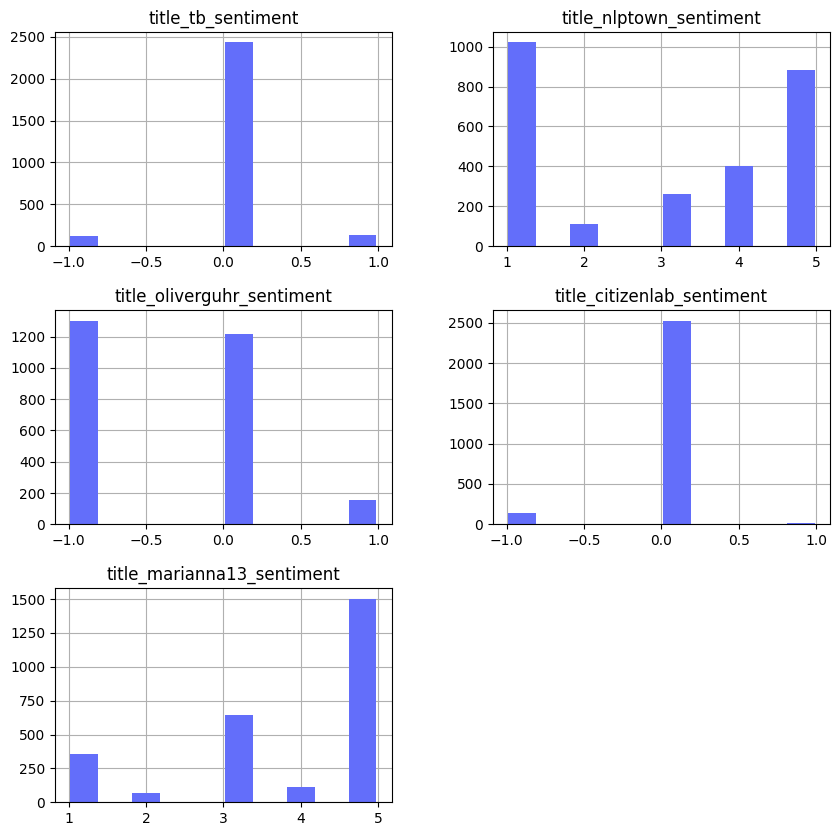

In [9]:
get_hist(data, title_sentiment_cols)

In [10]:
scores_title = data[title_sentiment_cols].melt()
scores_description = data[description_sentiment_cols].melt()

## Scores distributiion

In [11]:
px.histogram(rescaled[title_sentiment_cols].melt(), x='value', color="variable", barmode="group", title='Scores distribution: Title')

In [12]:
px.histogram(rescaled[description_sentiment_cols].melt(), x='value', color="variable", barmode="group", title='Scores distribution: Description')

In [13]:
# for var_name in ['title', 'description', 'content']:
#     px.scatter(data, 
#                 x=f'{var_name}_tb_sentiment', 
#                 y=f'{var_name}_bert_sentiment', 
#                 title=f'Scatter "{var_name.upper()}": TextBlob vs. BERT',
#                 trendline="ols").show()

## Scores correlation

In [14]:
for model_name in ['tb','nlptown','oliverguhr','citizenlab','marianna13']:
    var_x = "title"
    var_y = "description"
    px.scatter(data, 
                x=f"{var_x}_{model_name}_sentiment", 
                y=f"{var_y}_{model_name}_sentiment", 
                title=f'Scatter "{model_name.upper()}": {var_x} vs. {var_y}',
                trendline="ols").show()

## Time series

In [15]:
model_names = ['title_nlptown_sentiment', 'title_marianna13_sentiment']
winning_model = model_names[0]

In [16]:
grouped = data[['date',winning_model]] \
                .groupby(by=['date',winning_model]) \
                .agg({winning_model:'count'}) \
                .rename(columns={winning_model:"count"}) \
                .reset_index() \
                .rename(columns={winning_model:"label"})
grouped['date'] = grouped['date'].astype(str)
grouped['label'] = grouped['label'].apply(lambda x: f"{str(x)} stars")

In [17]:
def print_line(data, x, y, color, w=800, h=400, save_to_folder=None, prefix=None):
    fig = px.line(data, x=x, y=y, color=color, width=w, height=h)
    fig.update_layout(paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)')

    if save_to_folder and prefix:
        save_path = f"{save_to_folder}/{prefix}_ts_{y}_{x}.png"
        fig.write_image(save_path) 

    fig.show()

In [18]:
print_line(grouped, x='date', y='count', color='label', w=600, h=300, save_to_folder=f"reports", prefix="vis")

In [19]:
mean_score = data.groupby(by=['query']) \
                .agg({winning_model:['mean']})
mean_score.columns = mean_score.columns.droplevel()
mean_score.reset_index(inplace=True)

In [20]:
import plotly.graph_objects as go
import itertools

fig = go.Figure()

vals = mean_score['mean'].tolist()
names = mean_score['query'].tolist()
rows = [0]
cols = [0,1]

for i, (row, col) in enumerate(itertools.product(rows, cols)):

    try:
        val = vals[i]
        name = names[i]
    except:
        break

    fig.add_trace(go.Indicator(
        value = val,
        delta = {'reference': 2.5},
        domain = {'row': row, 'column': col},
        title = {'text': name},
        gauge = {'axis': {'range': [0, 5]},
                 'threshold' : {'line': {'color': "red", 'width': 4}, 'thickness': 0.75, 'value': 2.5}}))

fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)',
    grid = {'rows': len(rows), 'columns': len(cols), 'pattern': "independent"},
    template = {'data' : {'indicator': [{
        'mode' : "number+delta+gauge"}]
                         }}, width=1000, height=400)

fig.write_image("reports/vis_gauges.png")

fig.show()

In [21]:
name = mean_score['query'].tolist()[0]
val = mean_score['mean'].tolist()[0]


mask = data['query'] == 'china-covid'
print_data = data[mask].copy()

scores = print_data.groupby(by=['date']) \
                .agg({winning_model:['mean']})
scores.columns = scores.columns.droplevel()
scores.reset_index(inplace=True)


fig = go.Figure(go.Indicator(
    mode = "number+delta",
    value = val,
    delta = {"reference": 2.5},
    title = {"text": name},
    domain = {'y': [0, 1], 'x': [0.25, 0.75]}))

fig.add_trace(go.Scatter(x=scores['date'].astype(str), y = scores['mean']))
fig.update_layout(width=1000, height=400, paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)')
fig.write_image("reports/vis_ts_gauge.png")

fig.show()

### Wordcloud

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def get_wordcloud(data, language = 'en', save_path = 'reports', w=300, h=300, score=1, print_out=True):
    mask = (data['language'] == language)&(data[winning_model] == score)
    print_data = data[mask]
    text = " ".join(print_data['title'].to_list())

    wordcloud = WordCloud(max_font_size=50, max_words=200, background_color="white", width=w, height=h).generate(text)
    wordcloud.to_file(f"{save_path}/vis_wordcloud_{language}_scr{score}.png")

    if print_out:
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()

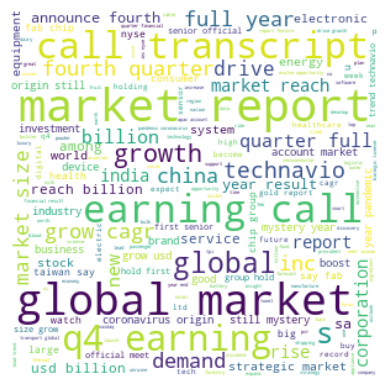

In [23]:
get_wordcloud(print_data, language = 'en', save_path = 'reports', w=300, h=300, score=5)

In [24]:
for lang in ['en', 'de']:
    for scr in [1,5]:
        get_wordcloud(print_data, language = lang, save_path = 'reports', w=300, h=300, score=scr, print_out=False)

## N-Gram analysis

In [25]:
import nltk
from nltk.util import ngrams

In [26]:
def get_bigram(text):
    big=''
    token = nltk.word_tokenize(text)
    big=(list(ngrams(token, 2)))
    return str(big)

text_cols = ['title','description','content']

for col in text_cols:
    data[f'{col}_bigrams'] = data[col].apply(get_bigram);

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [28]:
def get_ngrams(data, cols, qs, sentiment, model):
    df_ngram = pd.DataFrame()
    for col in cols: # text_cols:
        for q in qs: #qs:
            c_vec = CountVectorizer(ngram_range=(2,3))
            mask = (data['query'] == q)&(data[f'{col}_{model}_sentiment'] == sentiment)
            ngrams = c_vec.fit_transform(data.loc[mask, col]) # matrix of ngrams   
            count_values = ngrams.toarray().sum(axis=0) # count frequency of ngrams
            vocab = c_vec.vocabulary_ # list of ngrams
            df_tmp = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)).rename(columns={0: 'frequency', 1:'n-gram'})
            df_ngram = pd.concat((df_ngram, df_tmp.iloc[:10]), axis=0)
    df_ngram.reset_index(inplace=True, drop=True)

    return df_ngram

### Title

In [29]:
col = 'title'
mod = 'bert'
n1 = get_ngrams(data, cols=[col], qs=['china%20covid'], sentiment=1, model=mod)
n1.columns = pd.MultiIndex.from_product([[f'sentiment_negative'], n1.columns])
n2 = get_ngrams(data, cols=[col], qs=['china%20covid'], sentiment=5, model=mod)
n2.columns = pd.MultiIndex.from_product([[f'sentiment_positive'], n2.columns])

pd.concat((n1,n2), axis=1)

KeyError: 'title_bert_sentiment'

In [ ]:
col = 'title'
mod = 'tb'
n1 = get_ngrams(data, cols=[col], qs=['china%20covid'], sentiment=-1, model=mod)
n1.columns = pd.MultiIndex.from_product([[f'sentiment_negative'], n1.columns])
n2 = get_ngrams(data, cols=[col], qs=['china%20covid'], sentiment=1, model=mod)
n2.columns = pd.MultiIndex.from_product([[f'sentiment_positive'], n2.columns])

pd.concat((n1,n2), axis=1)

sentiment_negative                           sentiment_positive  \
           frequency                    n-gram          frequency   
0                  2     roche johnson johnson                  4   
1                  2             roche johnson                  4   
2                  2       report 2023 feature                  3   
3                  2               report 2023                  2   
4                  2  novartis abbvie hoffmann                  2   
5                  2           novartis abbvie                  2   
6                  2        market report 2023                  2   
7                  2             market report                  2   
8                  2    lipid base formulation                  2   
9                  2                lipid base                  2   

                            
                    n-gram  
0              market size  
1                full year  
2              report 2023  
3      year revenue growth  
4             year revenue  
5         year 2022 result  
6                year 2022  
7         worth around usd  
8             worth around  
9  vehicle offer excellent

### Description

In [ ]:
col = 'description'
mod = 'bert'
n1 = get_ngrams(data, cols=[col], qs=['china%20covid'], sentiment=1, model=mod)
n1.columns = pd.MultiIndex.from_product([[f'sentiment_negative'], n1.columns])
n2 = get_ngrams(data, cols=[col], qs=['china%20covid'], sentiment=5, model=mod)
n2.columns = pd.MultiIndex.from_product([[f'sentiment_positive'], n2.columns])

pd.concat((n1,n2), axis=1)

sentiment_negative                         sentiment_positive  \
           frequency                  n-gram          frequency   
0                 10                 27 2023                  4   
1                  9             jan 27 2023                  3   
2                  9                  jan 27                  3   
3                  9          globe newswire                  2   
4                  9           dublin jan 27                  2   
5                  9              dublin jan                  2   
6                  9           27 2023 globe                  2   
7                  9     2023 globe newswire                  2   
8                  9              2023 globe                  2   
9                  8  researchandmarkets com                  2   

                              
                      n-gram  
0              global market  
1            automotive fuse  
2                    27 2023  
3    ubereat takeaway subway  
4           ubereat takeaway  
5             top smartphone  
6          top player swiggy  
7                 top player  
8  thrust reverser actuation  
9            thrust reverser

In [ ]:
col = 'description'
mod = 'tb'
n1 = get_ngrams(data, cols=[col], qs=['china%20covid'], sentiment=-1, model=mod)
n1.columns = pd.MultiIndex.from_product([[f'sentiment_negative'], n1.columns])
n2 = get_ngrams(data, cols=[col], qs=['china%20covid'], sentiment=1, model=mod)
n2.columns = pd.MultiIndex.from_product([[f'sentiment_positive'], n2.columns])

pd.concat((n1,n2), axis=1)

sentiment_negative                             sentiment_positive  \
           frequency                      n-gram          frequency   
0                  2     web application service                  6   
1                  2             web application                  4   
2                  2  trend opportunity forecast                  4   
3                  2           trend opportunity                  4   
4                  2   subscription base service                  4   
5                  2           subscription base                  4   
6                  2        source lipid natural                  4   
7                  2                source lipid                  3   
8                  2    solution regulate access                  3   
9                  2           solution regulate                  3   

                       
               n-gram  
0           full year  
1           year 2022  
2       sale increase  
3  marketscreener com  
4      full year 2022  
5      fourth quarter  
6             27 2023  
7   quarter full year  
8        quarter full  
9           per share